In [1]:
import tensorflow

In [2]:
print(tensorflow.__version__)

2.19.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
DataDir=r"train/"

In [5]:
CATEGORIES=["normal","opacity"]

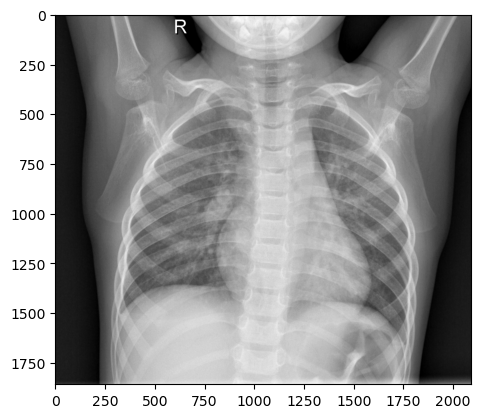

In [6]:
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [7]:
img_size=100

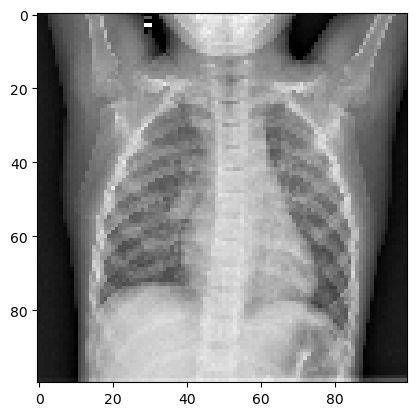

In [8]:
#ahow image after resizing 
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [9]:
training_data=[]

In [10]:
def create_training_data():
    for i in CATEGORIES:
        path=os.path.join(DataDir, i)
        class_num=CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

4192


In [13]:
import random
random.shuffle(training_data)
for sample in training_data[:6]:
    print(sample)

[array([[0, 0, 7, ..., 8, 0, 0],
       [0, 0, 3, ..., 5, 0, 0],
       [0, 0, 5, ..., 4, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 0]
[array([[180,  41,  26, ...,  50,  48,  50],
       [139,  41, 158, ...,  63,  50,  51],
       [ 26,  33, 142, ...,  66,  53,  54],
       ...,
       [ 19,  24,  23, ...,  14,  17,  17],
       [ 19,  22,  23, ...,  14,  17,  17],
       [ 19,  22,  23, ...,  15,  15,  17]], dtype=uint8), 1]
[array([[  0,   0,   0, ...,  97, 102, 130],
       [  0,   0,   0, ..., 109, 122, 132],
       [  0,   0,   0, ..., 113, 149,  50],
       ...,
       [  0,  57, 121, ...,   0,   0,   0],
       [  0,  92, 120, ...,   0,   0,   0],
       [  0,  75, 114, ...,   0,   0,   0]], dtype=uint8), 0]
[array([[ 57,  59,  59, ...,  45,  73, 174],
       [ 69,  58,  58, ...,  19,  19, 117],
       [122, 109,  54, ...,  38,  65,  63],
       ...,
       [  0,   0,   0, ...,   0,   0,   2]

In [14]:
X=[]
y=[]

#split the data
for features,label in training_data:
    X.append(features)
    y.append(label)


print(X[0].reshape(-1,img_size,img_size,1))

[[[[0]
   [0]
   [7]
   ...
   [8]
   [0]
   [0]]

  [[0]
   [0]
   [3]
   ...
   [5]
   [0]
   [0]]

  [[0]
   [0]
   [5]
   ...
   [4]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [15]:
y=np.array(y)

# make features compatible with tensorflow by reshaping them
X=np.array(X).reshape(-1,img_size,img_size,1)

In [16]:
#Make the same process with the validation data
val_data=[]
DataDir_val=r"val/"

def create_val_data():
    for i in CATEGORIES:
        path=os.path.join(DataDir_val, i)
        class_num=CATEGORIES.index(i)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                val_data.append([new_array,class_num])

            except Exception as e:
                pass

In [17]:
create_val_data()
print(len(val_data))

1040


In [18]:
import random
random.shuffle(val_data)
for sample in val_data[:6]:
    print(sample)

[array([[ 13,  14,  13, ..., 158, 170, 173],
       [ 11,  12,  12, ..., 160, 145, 166],
       [  7,  12,  10, ..., 145, 162, 148],
       ...,
       [  7,   4,  22, ...,  20,  17,  16],
       [ 15,   5,  31, ...,  22,  16,  16],
       [ 30,   4,  36, ...,  17,  16,  32]], dtype=uint8), 1]
[array([[114, 164, 151, ...,  85,  89, 105],
       [125, 171, 157, ...,  82,  94,  90],
       [146, 169, 158, ...,  69,  78,  80],
       ...,
       [ 10,   6,   6, ...,   4,   4,   5],
       [  5,   6,   6, ...,   4,   4,   4],
       [  7,   6,   6, ...,   4,   4,   4]], dtype=uint8), 1]
[array([[74, 95, 94, ..., 43, 33, 38],
       [56, 58, 74, ..., 48, 30, 46],
       [59, 60, 59, ..., 55, 29, 45],
       ...,
       [16, 17, 11, ..., 28, 28, 22],
       [19, 16, 11, ..., 28, 28, 28],
       [19, 17, 10, ..., 28, 28, 28]], dtype=uint8), 1]
[array([[  8,  12,  23, ..., 228, 205,  16],
       [  7,  17,  21, ...,  34,  23,   2],
       [  7,  14,  23, ...,  31,  15,   9],
       ...,
      

In [19]:
X_val=[]
y_val=[]

#split the data
for features,label in val_data:
    X_val.append(features)
    y_val.append(label)


print(X_val[0].reshape(-1,img_size,img_size,1))

[[[[ 13]
   [ 14]
   [ 13]
   ...
   [158]
   [170]
   [173]]

  [[ 11]
   [ 12]
   [ 12]
   ...
   [160]
   [145]
   [166]]

  [[  7]
   [ 12]
   [ 10]
   ...
   [145]
   [162]
   [148]]

  ...

  [[  7]
   [  4]
   [ 22]
   ...
   [ 20]
   [ 17]
   [ 16]]

  [[ 15]
   [  5]
   [ 31]
   ...
   [ 22]
   [ 16]
   [ 16]]

  [[ 30]
   [  4]
   [ 36]
   ...
   [ 17]
   [ 16]
   [ 32]]]]


In [20]:
y_val=np.array(y_val)

# make features compatible with tensorflow by reshaping them
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
import pickle

In [22]:
from keras.layers import Conv2D, MaxPooling2D

#scaling between 0 and 255
X=X/255.0
x_val=X_val/255.0

In [23]:
X.shape

(4192, 100, 100, 1)

In [24]:
X_val.shape

(1040, 100, 100, 1)

In [25]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))  


C:\Users\assma\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 395,265 (1.51 MB)

 Trainable params: 395,265 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit(X,y,batch_size=4,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 95s 87ms/step - accuracy: 0.8403 - loss: 0.3858 - val_accuracy: 0.7433 - val_loss: 475.9818
Epoch 2/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 91s 87ms/step - accuracy: 0.9449 - loss: 0.1514 - val_accuracy: 0.7529 - val_loss: 174.1229
Epoch 3/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 91s 86ms/step - accuracy: 0.9596 - loss: 0.1189 - val_accuracy: 0.9500 - val_loss: 12.4497
Epoch 4/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 92s 88ms/step - accuracy: 0.9691 - loss: 0.0901 - val_accuracy: 0.9596 - val_loss: 13.3024
Epoch 5/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 96s 91ms/step - accuracy: 0.9652 - loss: 0.0977 - val_accuracy: 0.8673 - val_loss: 76.5172
Epoch 6/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 98s 93ms/step - accuracy: 0.9726 - loss: 0.0650 - val_accuracy: 0.8192 - val_loss: 127.2600
Epoch 7/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 101s 96ms/step - accuracy: 0.9707 - loss: 0.0721 - val_accuracy: 0.7846 - val_loss: 200.8278
Epoch 8/10
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 96s 92ms/step - accura

In [29]:
# save the model for testing
model.save(r"model_xray.h5")

### TEST the model

In [31]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.models import load_model

In [32]:
CATEGORIES=["normal","opacity"]

In [33]:
def prepare(image):
    img_size=100
    img=tf.keras.preprocessing.image.load_img(image,color_mode='grayscale',target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)
    return new_array.reshape(-1,img_size,img_size,1)

In [34]:
model=tf.keras.models.load_model(r"model_xray.h5")

In [35]:
imaget=r'test/normal/NORMAL2-IM-0237-0001.jpeg'
prediction=model.predict([prepare(imaget)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


C:\Users\assma\AppData\Roaming\Python\Python312\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=('Tensor(shape=(1, 100, 100, 1))',)
  warnings.warn(msg)


[[0.9995405]]
1
opacity


# USE PRE-TRAINED MODEL

In [85]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size=100
#load the pretrained model
base_model=VGG16(input_shape=(img_size,img_size,3),include_top=False,weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False

x=Flatten()(base_model.output)
x=Dense(256,activation='relu')(x)
x=Dense(128,activation='relu')(x)
x=Dense(64,activation='relu')(x)
predictions=Dense(1, activation='sigmoid')(x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#define the image generators for training and validation data
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen=ImageDataGenerator(rescale=1./255)


train_dir="train/"
val_dir="val/"

train_generator=train_datagen.flow_from_directory(train_dir, target_size=(img_size,img_size),batch_size=32,class_mode='binary', color_mode='rgb')
val_generator=val_datagen.flow_from_directory(val_dir, target_size=(img_size,img_size),batch_size=32,class_mode='binary', color_mode='rgb')

#train the model
model.fit(train_generator,epochs=10, validation_data=val_generator)

test_dir='test/'
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(img_size,img_size),batch_size=32,class_mode='binary', color_mode='rgb')
test_loss,test_acc=model.evaluate(test_generator)
print('test accuracy:', test_acc)

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 206s 2s/step - accuracy: 0.9640 - loss: 0.1013 - val_accuracy: 0.9019 - val_loss: 0.2405
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 212s 2s/step - accuracy: 0.9572 - loss: 0.1024 - val_accuracy: 0.9471 - val_loss: 0.1825
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9550 - loss: 0.1076 - val_accuracy: 0.9510 - val_loss: 0.1627
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.9583 - loss: 0.1041 - val_accuracy: 0.9317 - val_loss: 0.1664
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9626 - loss: 0.0997 - val_accuracy: 0.9471 - val_loss: 0.1515
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9614 - loss: 0.0971 - val_accuracy: 0.9442 - val_loss: 0.1455
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9678 - loss: 0.0930 - val_accuracy: 0.9385 - val_loss: 0.1582
Epoch 8/10
13

In [87]:
#save the pt model
model.save("Xray_pretrained_model.h5")

In [89]:
model=tf.keras.models.load_model("Xray_pretrained_model.h5")
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,935,811 (60.79 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

In [91]:
test_dir='test/'
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory(test_dir, target_size=(img_size,img_size), batch_size=32, class_mode='binary', color_mode='rgb')
test_loss, test_acc = model.evaluate(test_generator)
print('test accuracy:', test_acc)


Found 625 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9149 - loss: 0.2297
test accuracy: 0.9103999733924866
